In [1]:
#load dataset
import pandas as pd
data=pd.read_csv('data/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Basic statistics
print(data.info())
print(data.describe())
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())
#check for duplicated data
print('Duplicated data:')
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
#convert entries for Total Charges
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [4]:
#check for null values after coercing convertion
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [5]:
#fill null values since they are not much
data['TotalCharges']=data.fillna(data['TotalCharges'].mean(),inplace=True)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


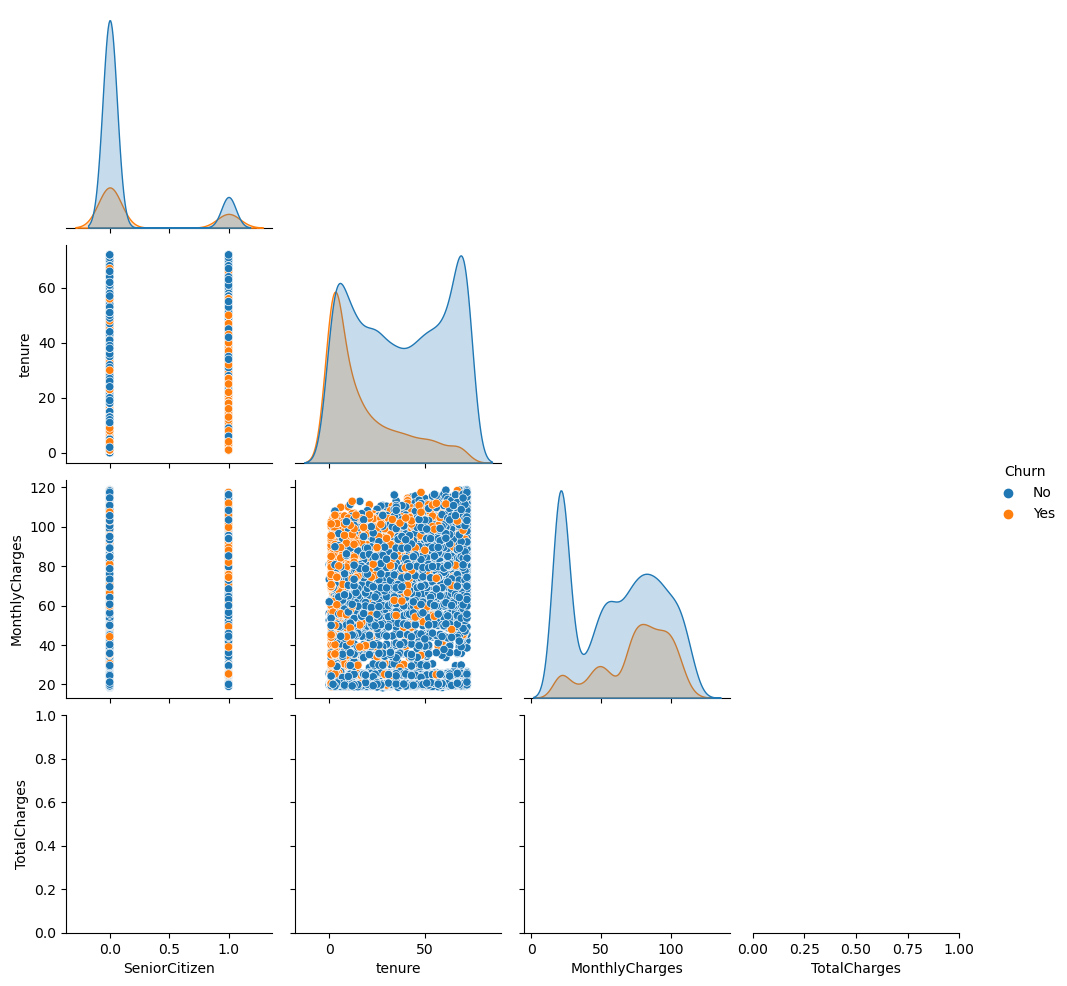

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Basic statistics
print(data.describe())

# Visualize feature distributions and relationships
sns.pairplot(data, hue='Churn', corner=True)
plt.show()


In [7]:
#import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [8]:
#convert categorical data to numeric representations using LabelEncoder
for column in data.select_dtypes(include=['object']):
    if column != 'customerID':
        data[column] = LabelEncoder().fit_transform(data[column])


In [9]:
# Splitting dataset
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Training and evaluating models
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)

In [12]:
#Metrics
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_precision = precision_score(y_test, logreg_preds)
logreg_recall = recall_score(y_test, logreg_preds)
logreg_f1 = f1_score(y_test, logreg_preds)

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

svc_accuracy = accuracy_score(y_test, svc_preds)
svc_precision = precision_score(y_test,svc_preds)
svc_recall = recall_score(y_test, svc_preds)
svc_f1 = f1_score(y_test, svc_preds)

print(f"Logistic Regression - Accuracy: {logreg_accuracy}, Precision: {logreg_precision}, Recall: {logreg_recall}, F1: {logreg_f1}")
print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1: {rf_f1}")
print(f"SVM Metrics - Accuracy: {svc_accuracy}, Precision: {svc_precision}, Recall: {svc_recall}, F1: {svc_f1}")


Logistic Regression - Accuracy: 0.8102224325603408, Precision: 0.6813417190775681, Recall: 0.5662020905923345, F1: 0.6184586108468126
Random Forest - Accuracy: 0.7870326549929011, Precision: 0.6441860465116279, Recall: 0.48257839721254353, F1: 0.5517928286852589
SVM Metrics - Accuracy: 0.8002839564600095, Precision: 0.6862745098039216, Recall: 0.4878048780487805, F1: 0.5702647657841141


In [13]:
# Hyperparameter tuning
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


In [14]:
# Feature selection
rfe = RFE(RandomForestClassifier(**best_params), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

rf_optimized = RandomForestClassifier(**best_params)
rf_optimized.fit(X_train_rfe, y_train)
rf_optimized_preds = rf_optimized.predict(X_test_rfe)

rf_optimized_accuracy = accuracy_score(y_test, rf_optimized_preds)
rf_optimized_precision = precision_score(y_test, rf_optimized_preds)
rf_optimized_recall = recall_score(y_test, rf_optimized_preds)
rf_optimized_f1 = f1_score(y_test, rf_optimized_preds)

print(f"Optimized Random Forest - Accuracy: {rf_optimized_accuracy}, Precision: {rf_optimized_precision}, Recall: {rf_optimized_recall}, F1: {rf_optimized_f1}")



Optimized Random Forest - Accuracy: 0.7998106956933271, Precision: 0.6735632183908046, Recall: 0.5104529616724739, F1: 0.580773042616452


In [15]:
#Identifying important features
important_features = pd.Series(rf_optimized.feature_importances_, index=X.columns[rfe.support_])
important_features = important_features.sort_values(ascending=False)

print("Important Features:")
print(important_features)


#Conclusion
print("\nBased on the evaluation metrics, the Optimized Random Forest model is the best-performing model.")
print("The top five features contributing to customer churn prediction are:")
print(important_features.head(5))

Important Features:
tenure              0.266219
MonthlyCharges      0.199977
Contract            0.183150
OnlineSecurity      0.094098
TechSupport         0.067124
PaymentMethod       0.052312
InternetService     0.051286
OnlineBackup        0.037800
PaperlessBilling    0.028180
DeviceProtection    0.019854
dtype: float64

Based on the evaluation metrics, the Optimized Random Forest model is the best-performing model.
The top five features contributing to customer churn prediction are:
tenure            0.266219
MonthlyCharges    0.199977
Contract          0.183150
OnlineSecurity    0.094098
TechSupport       0.067124
dtype: float64
